# Explanatory Data Analysis

## Import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_directory = 'data/'

data = pd.concat([pd.read_csv(data_directory + 'train.csv'), 
                  pd.read_csv(data_directory + 'test.csv'), 
                  pd.read_csv(data_directory + 'valid.csv')])

In [4]:
data

,en,vi,source
0,"- Sorry, that question's not on here.","- Xin lỗi, nhưng mà ở đây không có câu hỏi đấy.",OpenSubtitles v2018
1,He wants you to come with him immediately.,Ông ấy muốn bố đi với ông ấy ngay lập tức,OpenSubtitles v2018
2,I thought we could use some company.,Tôi nghĩ chúng ta có thể muốn vài người bạn đồ...,OpenSubtitles v2018
3,It was founded in 2008 by this anonymous progr...,Nó được sáng lập vào năm 2008 bởi một lập trìn...,TED2020 v1
4,"With both of these methods, no two prints are ...","Với cả hai phương pháp, không có hai bản in nà...",TED2020 v1
...,...,...,...
11311,Rhozali is a professor of linguistics at the u...,Rhozali là giáo sư ngôn ngữ học tại trường đại...,wikimedia v20210402
11312,You're sorry you ever joined the Brotherhood?,Mày hối hận vì gia nhập Hội anh em à?,OpenSubtitles v2018
11313,"How long has it been doing that, exactly?",Em làm được như vậy bao lâu rồi?,OpenSubtitles v2018
11314,"I'm not going to dive into them either, but ph...","Tôi sẽ không đi sâu vào chúng, nhưng tính năng...",TED2020 v1


## Simple analysis

Overall data decription:

In [5]:
data.describe(include='all')

,en,vi,source
count,2906992,2906992,2906992
unique,2906992,2906992,8
top,"- Sorry, that question's not on here.","- Xin lỗi, nhưng mà ở đây không có câu hỏi đấy.",OpenSubtitles v2018
freq,1,1,1459166


Calculate average length of 'en' senetences and 'vi' sentences:

In [6]:
# Calculate the average length of 'en' sentences
avg_length_en = data['en'].apply(len).mean()

# Calculate the average length of 'vi' sentences
avg_length_vi = data['vi'].apply(len).mean()

print('Average length of English sentences: ', round(avg_length_en))
print('Average length of Vietnamese sentences: ', round(avg_length_vi))

Average length of English sentences:  79
Average length of Vietnamese sentences:  81


Partition of sources:

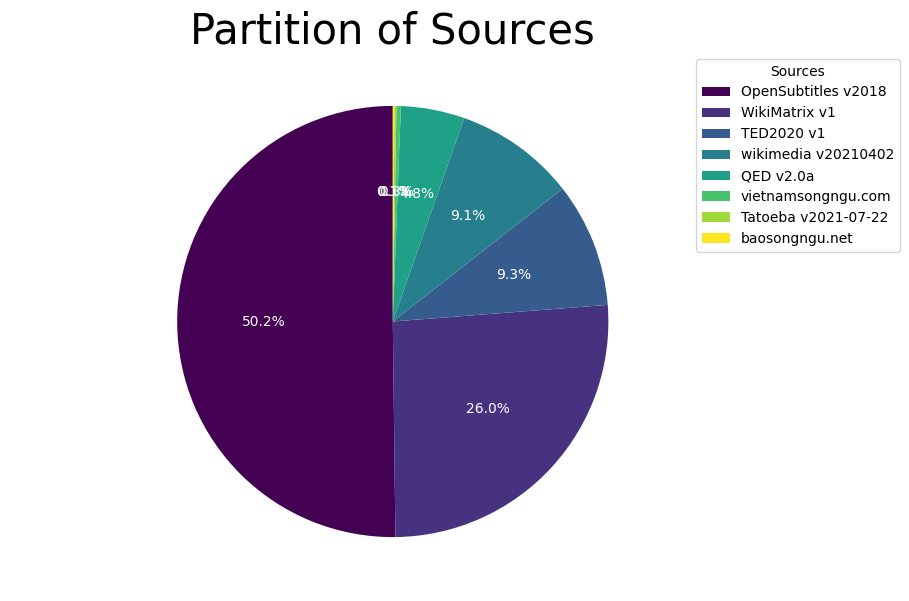

In [7]:
# Count the occurrences of each source
source_counts = data['source'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 7))
source_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', textprops={'color': 'w'})
plt.title('Partition of Sources', fontsize=30)
plt.ylabel('')  # Hide the y-label
plt.legend(source_counts.index, title="Sources", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## More specific analysis

Distribution of the length of sentences:

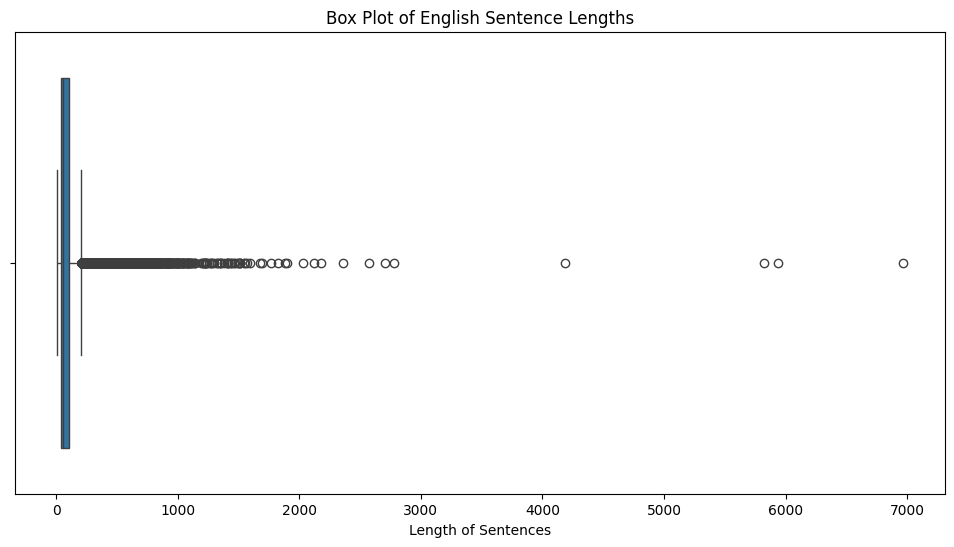

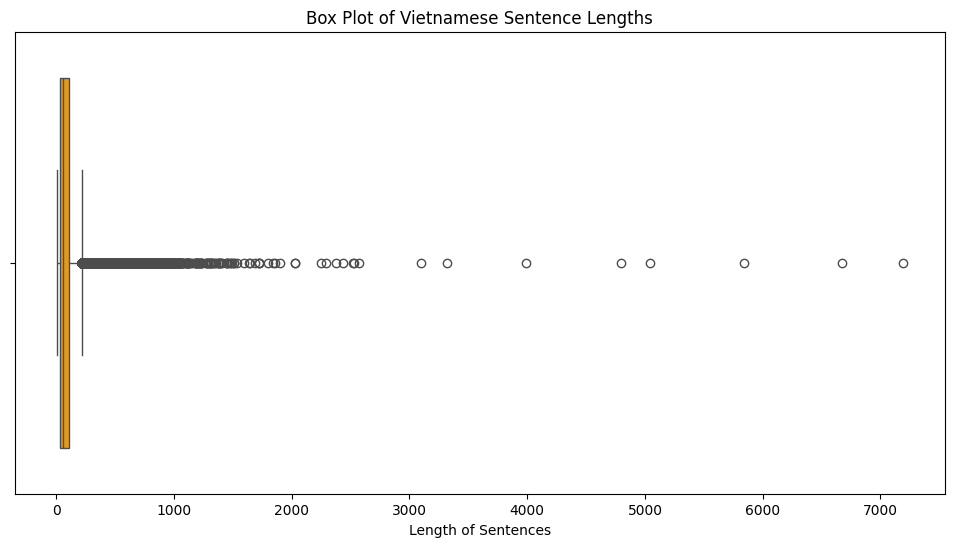

In [8]:
# Calculate the length of 'en' and 'vi' sentences
data['en_length'] = data['en'].apply(len)
data['vi_length'] = data['vi'].apply(len)

# Plot the box plot for English sentences
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['en_length'])
plt.title('Box Plot of English Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.show()

# Plot the box plot for Vietnamese sentences
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['vi_length'], color='orange')
plt.title('Box Plot of Vietnamese Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.show()


Analysis of absolute difference between English and Vietnamese length

C:\Users\aupho\AppData\Local\Temp\ipykernel_40080\2695948880.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='source', x='length_diff', data=data, palette='viridis')


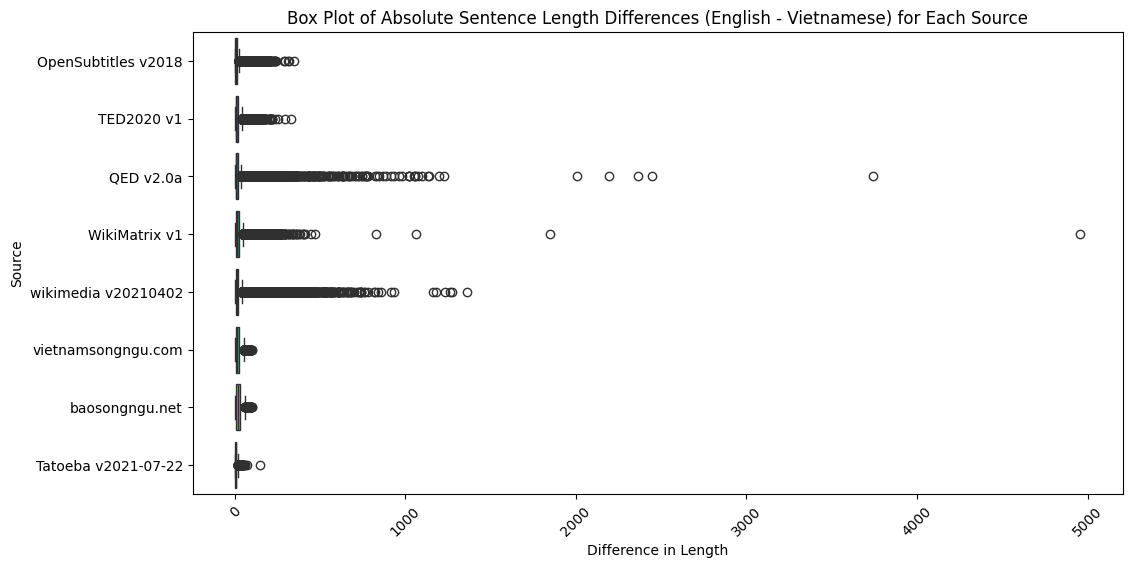

Source: OpenSubtitles v2018
	- Mean absolute difference in sentence length (English - Vietnamese): 8.97
	- Peak absolute difference in sentence length (English - Vietnamese): 345
	- Bottom absolute difference in sentence length (English - Vietnamese): 0
Source: TED2020 v1
	- Mean absolute difference in sentence length (English - Vietnamese): 13.15
	- Peak absolute difference in sentence length (English - Vietnamese): 328
	- Bottom absolute difference in sentence length (English - Vietnamese): 0
Source: QED v2.0a
	- Mean absolute difference in sentence length (English - Vietnamese): 14.09
	- Peak absolute difference in sentence length (English - Vietnamese): 3739
	- Bottom absolute difference in sentence length (English - Vietnamese): 0
Source: WikiMatrix v1
	- Mean absolute difference in sentence length (English - Vietnamese): 17.23
	- Peak absolute difference in sentence length (English - Vietnamese): 4958
	- Bottom absolute difference in sentence length (English - Vietnamese): 0
Sour

In [10]:
# Split the data into each source
sources = data['source'].unique()

# Calculate the absolute difference in length between English and Vietnamese sentences
data['length_diff'] = (data['en_length'] - data['vi_length']).abs()

# Plot the box plot of the length differences for each source
plt.figure(figsize=(12, 6))
sns.boxplot(y='source', x='length_diff', data=data, palette='viridis')
plt.title('Box Plot of Absolute Sentence Length Differences (English - Vietnamese) for Each Source')
plt.ylabel('Source')
plt.xlabel('Difference in Length')
plt.xticks(rotation=45)
plt.show()

# Calculate and print the mean difference for each source
for source in sources:
	source_data = data[data['source'] == source]
	mean_diff = source_data['length_diff'].mean()
	peak_diff = source_data['length_diff'].max()
	bottom_diff = source_data['length_diff'].min()
	print(f'Source: {source}')
	print(f'	- Mean absolute difference in sentence length (English - Vietnamese):', round(mean_diff, 2))
	print(f'	- Peak absolute difference in sentence length (English - Vietnamese):', round(peak_diff, 2))
	print(f'	- Bottom absolute difference in sentence length (English - Vietnamese):', round(bottom_diff, 2))


Analysis words frequency:

Top 10 words in English sentences for source 'OpenSubtitles v2018':
  you: 536692
  i: 482243
  the: 477562
  to: 370217
  a: 280026
  s: 243081
  it: 216585
  and: 205911
  of: 189591
  that: 189177


Top 10 words in English sentences for source 'TED2020 v1':
  the: 214648
  and: 149483
  to: 132274
  of: 119569
  a: 108105
  that: 97824
  i: 82363
  in: 80973
  it: 75588
  we: 71324


Top 10 words in English sentences for source 'QED v2.0a':
  the: 73943
  to: 49197
  and: 44495
  i: 42858
  you: 41036
  a: 37870
  of: 36073
  that: 31623
  it: 29937
  is: 27488


Top 10 words in English sentences for source 'WikiMatrix v1':
  the: 1142387
  of: 553536
  in: 455242
  and: 454051
  to: 341271
  a: 303789
  was: 178194
  is: 157343
  as: 135549
  on: 134666


Top 10 words in English sentences for source 'wikimedia v20210402':
  the: 350393
  of: 189556
  in: 151967
  and: 145874
  a: 117423
  to: 102986
  is: 76463
  was: 46535
  as: 46004
  for: 40159


Top 10 words in English sentenc

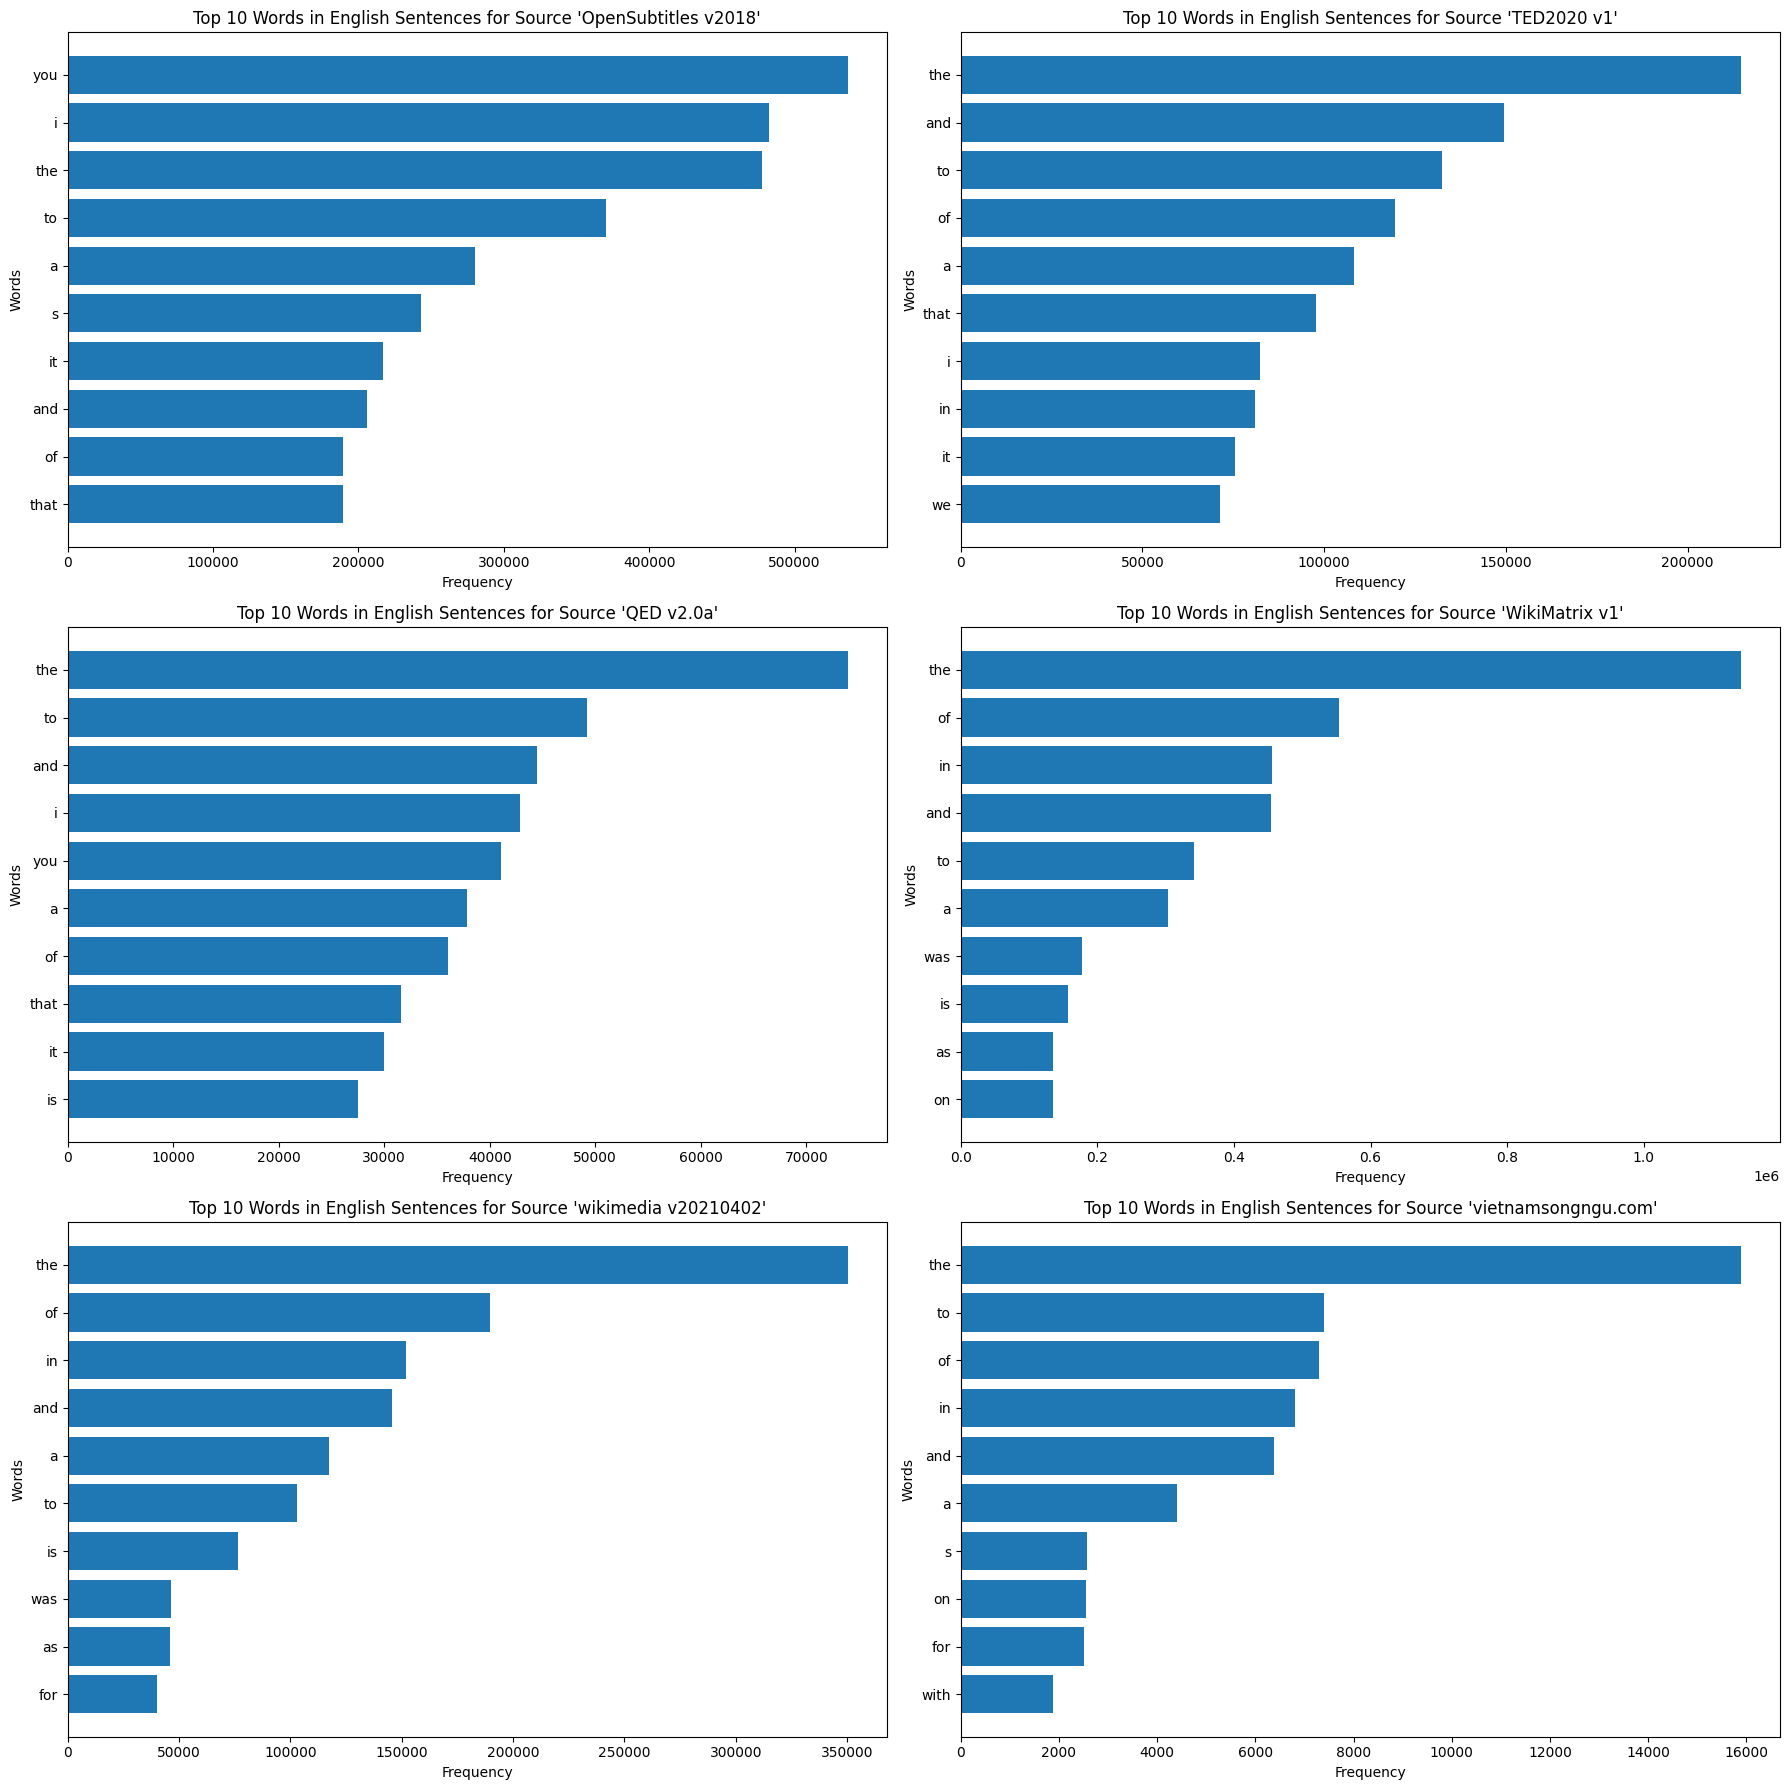

In [18]:
from collections import Counter
import re

def clean_tokenize(text):
	tokens = re.findall(r'\b\w+\b', text.lower())
	tokens = [word for word in tokens if word.isalpha()]
	return tokens

word_freq_by_source = {source: Counter() for source in sources}

# Iterate over each source and calculate word frequencies for English sentences
for source in sources:
	source_data = data[data['source'] == source]
	for sentence in source_data['en']:
		tokens = clean_tokenize(sentence)
		word_freq_by_source[source].update(tokens)

# Print the top 10 most common words for each source in English sentences
for source, counter in word_freq_by_source.items():
	print(f"Top 10 words in English sentences for source '{source}':")
	for word, freq in counter.most_common(10):
		print(f"  {word}: {freq}")
	print("\n")

# Draw horizontal bar charts to represent the top 10 most common words for each source in English sentences
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for ax, (source, counter) in zip(axes, word_freq_by_source.items()):
	top_words = counter.most_common(10)
	words, freqs = zip(*top_words)
	
	ax.barh(words, freqs)
	ax.set_title(f"Top 10 Words in English Sentences for Source '{source}'")
	ax.set_xlabel('Frequency')
	ax.set_ylabel('Words')
	ax.invert_yaxis()  # To display the highest frequency at the top

plt.tight_layout()
plt.show()

Top 10 words in Vietnamese sentences for source 'OpenSubtitles v2018':
  tôi: 416709
  không: 356052
  có: 294889
  là: 292873
  anh: 268980
  ta: 218601
  của: 178961
  một: 157880
  chúng: 155555
  và: 155333


Top 10 words in Vietnamese sentences for source 'TED2020 v1':
  tôi: 121702
  và: 121246
  là: 109461
  có: 99197
  một: 92542
  chúng: 84349
  những: 71757
  của: 68562
  không: 66330
  ta: 61978


Top 10 words in Vietnamese sentences for source 'QED v2.0a':
  tôi: 50426
  là: 45584
  có: 39503
  và: 37423
  một: 36516
  không: 31370
  của: 29639
  bạn: 24215
  chúng: 23633
  đó: 21455


Top 10 words in Vietnamese sentences for source 'WikiMatrix v1':
  và: 425678
  của: 404757
  một: 305240
  được: 288406
  là: 277843
  các: 266732
  trong: 247469
  năm: 246225
  có: 189259
  đã: 181580


Top 10 words in Vietnamese sentences for source 'wikimedia v20210402':
  và: 134953
  của: 133696
  một: 114312
  là: 100719
  được: 100259
  các: 91936
  trong: 80870
  năm: 73794
  có: 64

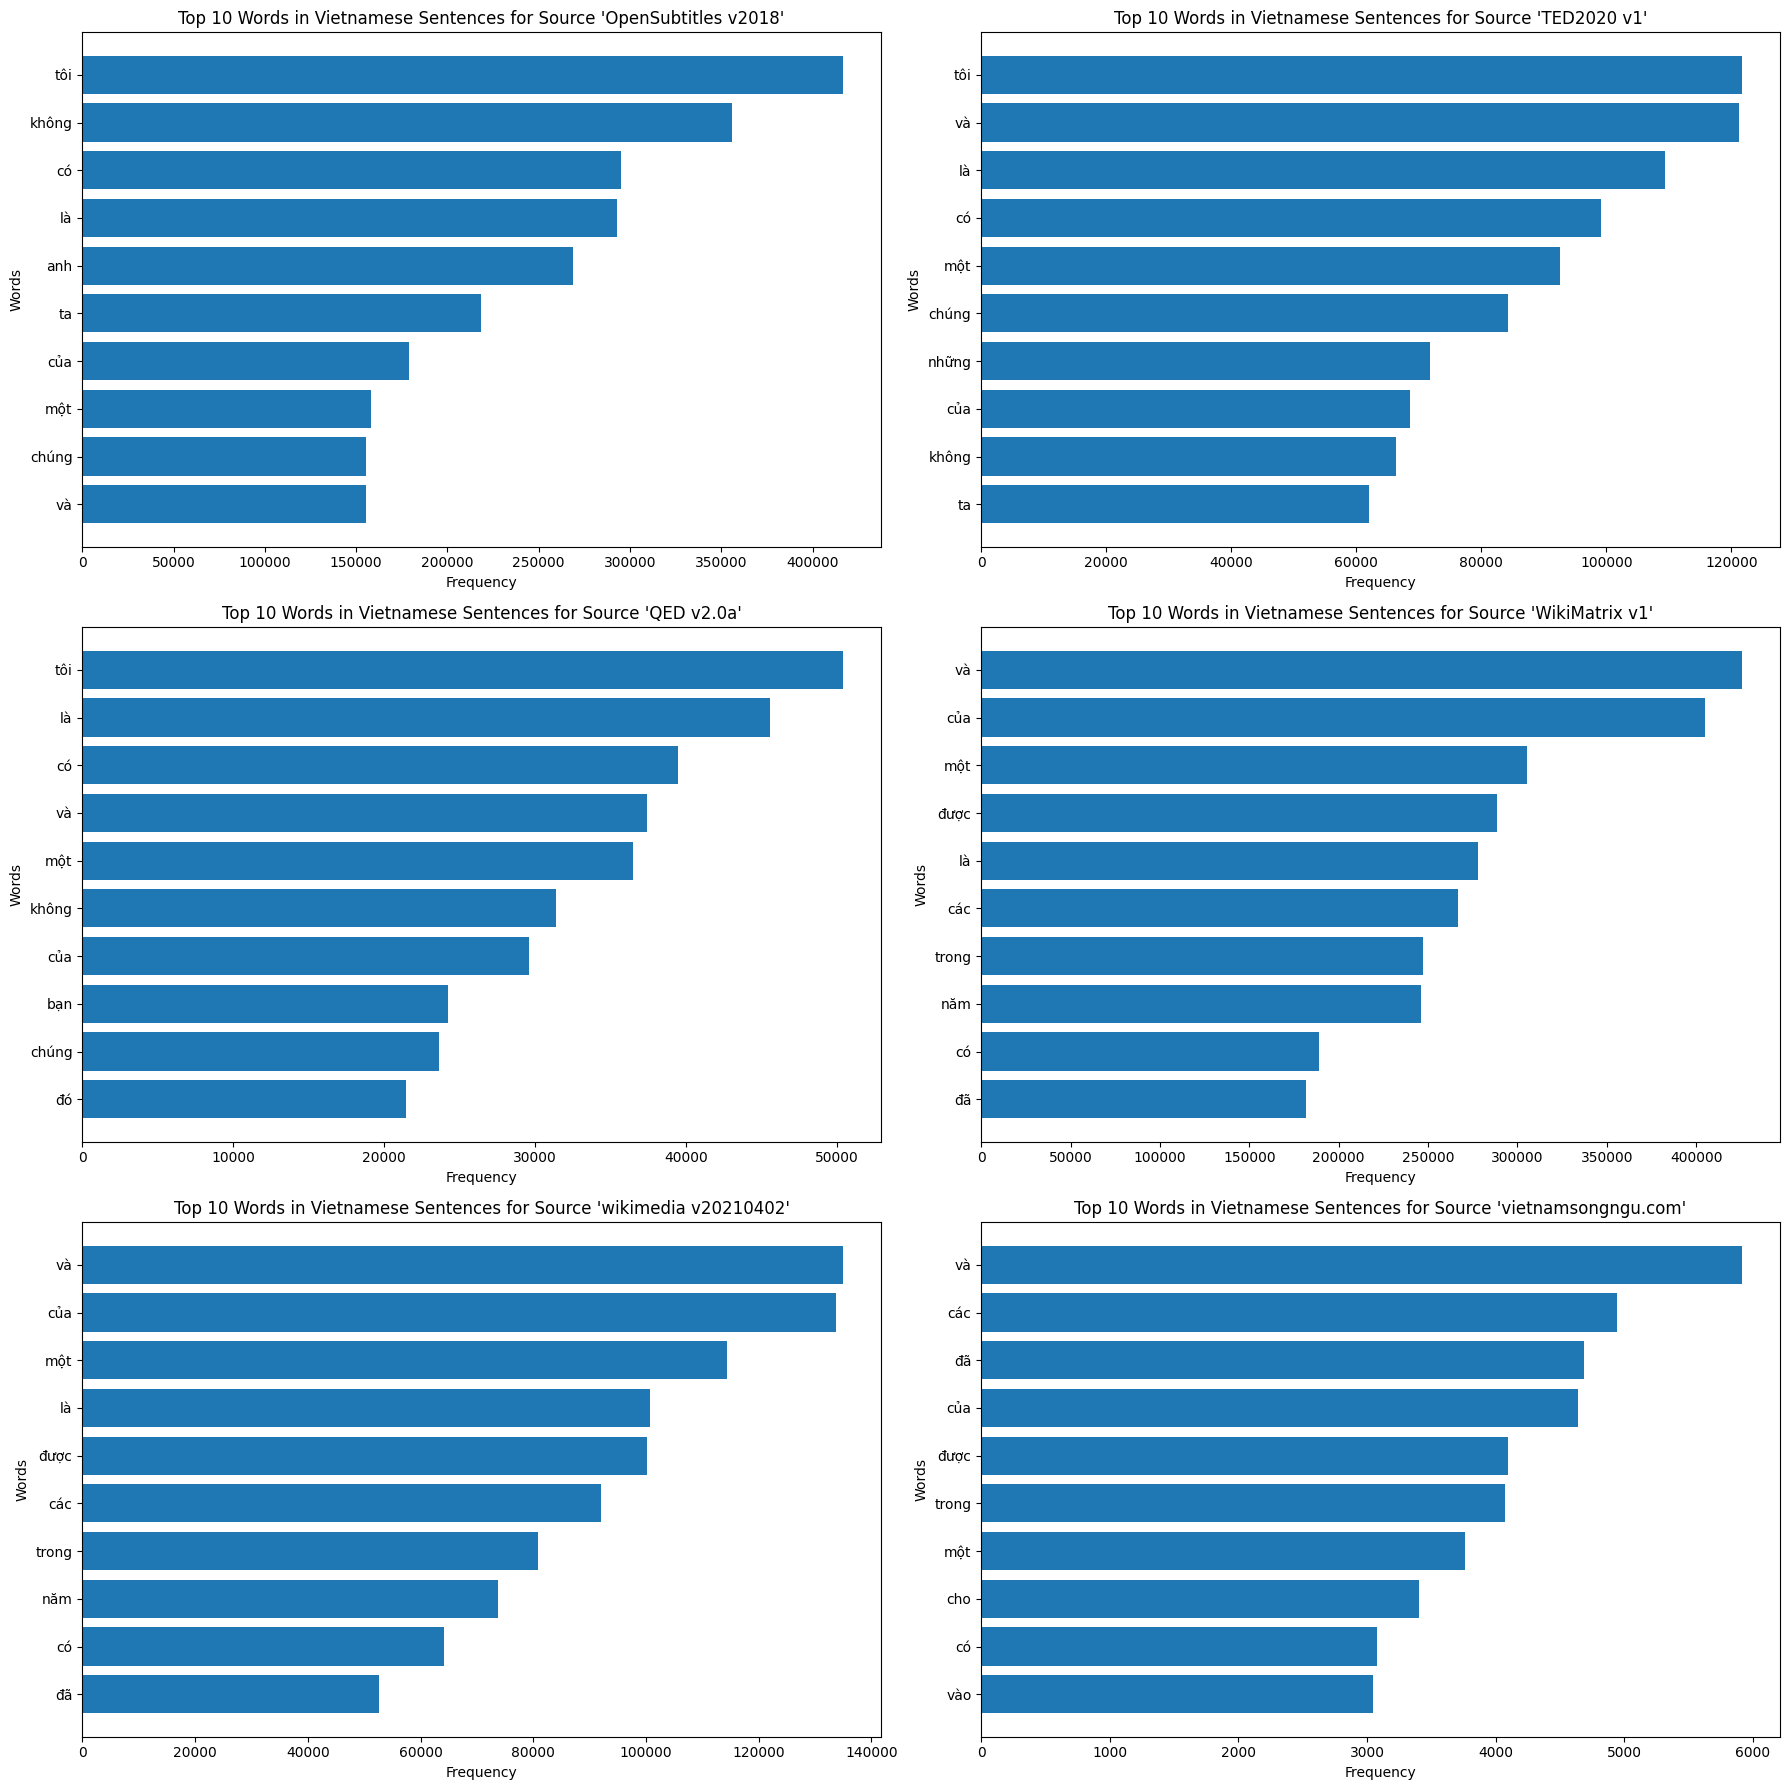

In [19]:
# Reset the word frequency counter for Vietnamese sentences
word_freq_by_source = {source: Counter() for source in sources}

# Iterate over each source and calculate word frequencies for Vietnamese sentences
for source in sources:
	source_data = data[data['source'] == source]
	for sentence in source_data['vi']:
		tokens = clean_tokenize(sentence)
		word_freq_by_source[source].update(tokens)

# Print the top 10 most common words for each source in Vietnamese sentences
for source, counter in word_freq_by_source.items():
	print(f"Top 10 words in Vietnamese sentences for source '{source}':")
	for word, freq in counter.most_common(10):
		print(f"  {word}: {freq}")
	print("\n")

# Draw horizontal bar charts to represent the top 10 most common words for each source in English sentences
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

for ax, (source, counter) in zip(axes, word_freq_by_source.items()):
	top_words = counter.most_common(10)
	words, freqs = zip(*top_words)
	
	ax.barh(words, freqs)
	ax.set_title(f"Top 10 Words in Vietnamese Sentences for Source '{source}'")
	ax.set_xlabel('Frequency')
	ax.set_ylabel('Words')
	ax.invert_yaxis()  # To display the highest frequency at the top

plt.tight_layout()
plt.show()